In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml

### Loading MNIST Data

In [35]:
# test = pd.read_csv('mnist_test.csv', names=[f"x{i}" for i in range(784)] + ["y"])
# train = pd.read_csv('mnist_train.csv', names=[f"x{i}" for i in range(784)] + ["y"])
test = pd.read_csv('mnist_test.csv',header=None)
train = pd.read_csv('mnist_train.csv', header=None)

In [36]:
print(test.shape)
test.head(5)

(10000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
print(train.shape)
train.head(5)

(60000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
def preprocess(data):
    X = data.iloc[:, 1:]
    y = data.iloc[:, 0]
    digits = {j:[] for j in range(10)}
    for j in range(len(y)):
        cur_label = int(y[j])
        cur_pixel_data = np.array(X.iloc[j]).reshape(28,28)
        digits[cur_label].append(cur_pixel_data)
    digits = {j:np.stack(digits[j]) for j in range(10)}
    for j in range(10):
        print('shape of data with label', j, ':', digits[j].shape)
    
    return digits

train_digits = preprocess(train)

shape of data with label 0 : (5923, 28, 28)
shape of data with label 1 : (6742, 28, 28)
shape of data with label 2 : (5958, 28, 28)
shape of data with label 3 : (6131, 28, 28)
shape of data with label 4 : (5842, 28, 28)
shape of data with label 5 : (5421, 28, 28)
shape of data with label 6 : (5918, 28, 28)
shape of data with label 7 : (6265, 28, 28)
shape of data with label 8 : (5851, 28, 28)
shape of data with label 9 : (5949, 28, 28)


In [39]:
test_digits = preprocess(test)

shape of data with label 0 : (980, 28, 28)
shape of data with label 1 : (1135, 28, 28)
shape of data with label 2 : (1032, 28, 28)
shape of data with label 3 : (1010, 28, 28)
shape of data with label 4 : (982, 28, 28)
shape of data with label 5 : (892, 28, 28)
shape of data with label 6 : (958, 28, 28)
shape of data with label 7 : (1028, 28, 28)
shape of data with label 8 : (974, 28, 28)
shape of data with label 9 : (1009, 28, 28)


In [40]:
train_one_data = train_digits[1]
train_two_data = train_digits[2]

train_one_labels = np.ones(len(train_one_data))
train_two_labels = np.ones(len(train_two_data))*-1

train_one_data = np.reshape(train_one_data, (len(train_one_data), 28*28))
train_two_data = np.reshape(train_two_data, (len(train_two_data), 28*28))

train_two_data.shape

(5958, 784)

In [41]:
train_one_data = train_one_data[:2000]
train_two_data = train_two_data[:2000]

train_one_labels = train_one_labels[:2000]
train_two_labels = train_two_labels[:2000]

train_data = np.concatenate((train_one_data, train_two_data))
train_labels = np.concatenate((train_one_labels, train_two_labels))

train_data.shape, train_labels.shape

((4000, 784), (4000,))

In [42]:
test_one_data = test_digits[1]
test_two_data = test_digits[2]

test_one_labels = np.ones(len(test_one_data))
test_two_labels = np.ones(len(test_two_data))*-1

test_one_data = np.reshape(test_one_data, (len(test_one_data), 28*28))
test_two_data = np.reshape(test_two_data, (len(test_two_data), 28*28))

test_two_data.shape

(1032, 784)

In [43]:
test_one_data = test_one_data[:500]
test_two_data = test_two_data[:500]

test_one_labels = test_one_labels[:500]
test_two_labels = test_two_labels[:500]

test_data = np.concatenate((test_one_data, test_two_data))
test_labels = np.concatenate((test_one_labels, test_two_labels))

test_data.shape, test_labels.shape

((1000, 784), (1000,))


### (1) 
For this question, use the first 2000 training data points for each of the digits 1 and 2, to form the pairs (xi, yi) ∈ R784 × {−1, 1}, i = 1, ..., 1000. Assign the label yi = 1 to the 1 digits, and the label yi = −1 to the 7 digits.

#### (a)

In [44]:
def F_w(w, X, y):
    z = np.dot(X, w)
    return np.mean(np.log(1 + np.exp(-y * z)))

def logistic_loss_gradient(w, x, y):
    z = np.dot(x, w)
    gradient = (-x * y) / (1 + np.exp(z * y))
    return gradient.reshape(w.shape)

def logistic_sgd(X, y, lr=1e-5, epochs=2000):

    w = np.zeros(X.shape[1])
    log_fw = []
    N = X.shape[0]

    for epoch in range(epochs):
        i = np.random.randint(N)
        random_x = X[i, :]
        random_y = y[i]
        stochastic_gd = logistic_loss_gradient(w, random_x, random_y)
        w = w - lr * stochastic_gd
        log_fw.append(np.log(F_w(w, X, y)))

    return w, log_fw


w, log_fw = logistic_sgd(train_data, train_labels)

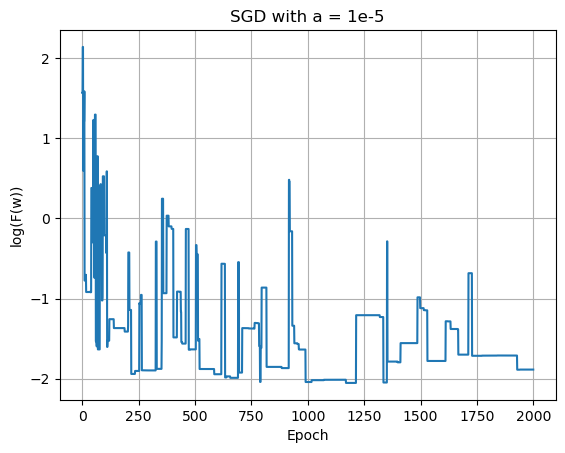

In [45]:
plt.plot(log_fw)
plt.xlabel('Epoch')
plt.ylabel('log(F(w))')
plt.title('SGD with a = 1e-5')
plt.grid()

plt.show()
plt.close()

#### (b)

The resulting plot shows a pattern indicating that SGD with fixed lr=1e-5 decreases, but not significantly, across iterations; instead, it oscillates between -2.0 and 1.5. It does not converge to a fixed w∗, which might be due to the way we implement SGD. We move along the gradient direction based on a random i drawn from the training dataset. This idea aligns with the in-class discussion because we move along the gradient direction at random, and the expected value of the random gradient is equal to the true gradient on average, but this is not guaranteed. The pattern demonstrates this reasoning: F(w) decreases over the iterations, but at any point, the randomly drawn point can lead to a step in the wrong direction.

#### (c)

In [46]:
def classify(w, X, y):
    y_pred = np.sign(np.dot(X, w))
    return np.mean(y_pred != y)

train_error = classify(w, train_data, train_labels)
test_error = classify(w, test_data, test_labels)

print('Train error: ', train_error)
print('Test error: ', test_error)

Train error:  0.01175
Test error:  0.009


### (2)

#### (a)

In [47]:
def logistic_sgd_with_decreasing_lr(X, y, lr=1e-4, epochs=2000):

    w = np.zeros(X.shape[1])
    log_fw = []
    N = X.shape[0]

    for epoch in range(epochs):
        i = np.random.randint(N)
        random_x = X[i, :]
        random_y = y[i]
        stochastic_gd = logistic_loss_gradient(w, random_x, random_y)

        update_lr = lr * np.sqrt(1 / (epoch + 1))

        w = w - update_lr * stochastic_gd
        log_fw.append(np.log(F_w(w, X, y)))

    return w, log_fw

w2, log_fw_2 = logistic_sgd_with_decreasing_lr(train_data, train_labels)

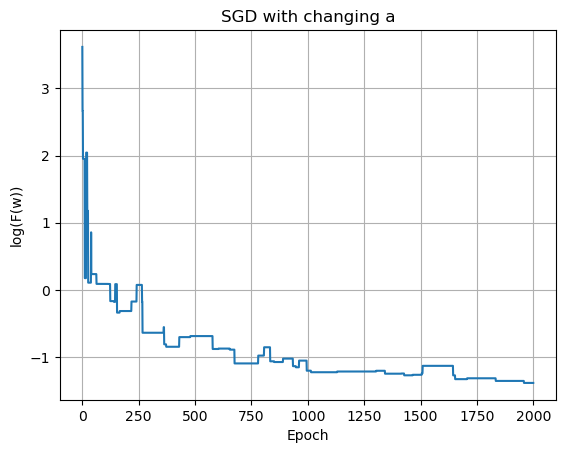

In [48]:
plt.plot(log_fw_2)
plt.xlabel('Epoch')
plt.ylabel('log(F(w))')
plt.title('SGD with changing a')
plt.grid()

plt.show()
plt.close()

#### (b)


Unlike part (a) with a fixed learning rate of 1e-5, the adjusted version of SGD, where the learning rate is altered with the epochs, shows a pattern that it is more robust against randomness. F(w) is decreasing over the iterations, and w* seems to converge to a fixed value. Along the graph, we can still observe some fluctuations caused by the random gradient between 0 to 250, but as the learning rate is normalized by the epochs, the wrong direction caused by randomness is also normalized. And this idea agrees with what we discussed in class and in part (1), where SGD is random, and with an adjustable learning rate, we can eliminate the drawbacks of computation and still converge to a reasonable w*

#### (c)

In [49]:
train_error = classify(w2, train_data, train_labels)
test_error = classify(w2, test_data, test_labels)

print('Train error: ', train_error)
print('Test error: ', test_error)

Train error:  0.01275
Test error:  0.015


### (3)

#### (a)

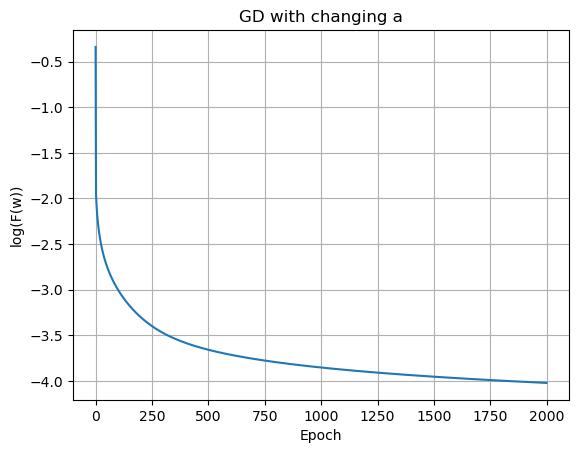

In [50]:
def F_w(w, X, y):
    z = np.dot(X, w)
    return np.mean(np.log(1 + np.exp(-y * z)))

def logistic_loss_gradient_batch(w, X, y):
    z = np.dot(X, w)
    gradients = (-X.T * y) / (1 + np.exp(z * y))
    return np.mean(gradients, axis=1)

def logistic_gd_with_decreasing_lr(X, y, lr=1e-4, epochs=2000):
    w = np.zeros(X.shape[1])
    log_fw = []
    N = X.shape[0]

    for epoch in range(epochs):
        # Compute the gradient over the entire batch
        batch_gd = logistic_loss_gradient_batch(w, X, y)

        # Update the learning rate
        update_lr = lr / np.sqrt(epoch + 1)

        # Update weights
        w = w - update_lr * batch_gd

        # Calculate and log the loss
        log_fw.append(np.log(F_w(w, X, y)))

    return w, log_fw


w3, log_fw_3 = logistic_gd_with_decreasing_lr(train_data, train_labels)

plt.plot(log_fw_3)
plt.xlabel('Epoch')
plt.ylabel('log(F(w))')
plt.title('GD with changing a')
plt.grid()

plt.show()
plt.close()

#### (b)

The convergence for GD with a changing learning rate is much smoother than that of SGD, and F(w) is clearly decreasing over iterations. The algorithm seems to converge to a fixed w*, resulting in minimal training and testing error compared to SGD. This pattern is related to what we discussed in class: GD moves along the gradient direction based on all data points at each iteration, which causes more computational cost. However, as a consequence, the convergence is smoother and more robust.

#### (c)

In [51]:
train_error = classify(w3, train_data, train_labels)
test_error = classify(w3, test_data, test_labels)

print('Train error: ', train_error)
print('Test error: ', test_error)

Train error:  0.00475
Test error:  0.008


#### (4) Comment 

#### (a) 

The computation of SGD, when compared to GD, is much less expensive, as can be clearly observed: both SGD with a fixed learning rate and with a changing learning rate take roughly 15 seconds, while GD takes 40 seconds. The computational complexity for SGD is lower because, at each iteration, it takes a gradient step based on a single data point, whereas GD takes a gradient step using the average across the entire dataset.

#### (b)

The SGD appears to converge to a minimum but not the global minimum yet because when I increase the iterations from 2000 to 5000, F(w) decreases to -2, whereas in 2000 iterations, it seems to plateau at around -1. On the other hand, GD converges smoothly to -4 within 2000 iterations. This clearly indicates that GD gets closer to the minimum, while SGD converges to a reasonable minimum. We can use the accuracy on testing data to understand why.

In conclusion with 2000 iterations SGD converge to -1 and GD converge to -4 so GD seems to be closer to global minimum.

#### (c)

The test accuracy for SGD with fixed lr is 99.959

The test accuracy for SGD with adapting lr is 99.986

The test accuracy for GD with adapting lr is 99.992

In general GD will be more accurate however compared to the computational tradeoff, SGD might be a better option if we are working on a much larger datasets since in this case it already yield a relatively high accuracy.